# Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
import matplotlib.pyplot as plt
import gc


import warnings
warnings.filterwarnings('ignore')

# Reading dataset

In [2]:
df = pd.read_excel("car_features.xlsx")
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
column_names = df.columns
list(column_names)

['Make',
 'Model',
 'Year',
 'Engine Fuel Type',
 'Engine HP',
 'Engine Cylinders',
 'Transmission Type',
 'Driven_Wheels',
 'Number of Doors',
 'Market Category',
 'Vehicle Size',
 'Vehicle Style',
 'highway MPG',
 'city mpg',
 'Popularity',
 'MSRP']

# Missing values handling

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [6]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [7]:
for i in column_names:
    if df[i].dtypes == 'object':
        df[i].fillna(df[i].mode()[0],inplace=True)
    else:
        df[i].fillna(df[i].mean(),inplace=True)

In [8]:
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11914 non-null  object 
 4   Engine HP          11914 non-null  float64
 5   Engine Cylinders   11914 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11914 non-null  float64
 9   Market Category    11914 non-null  object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

# Outliers handling

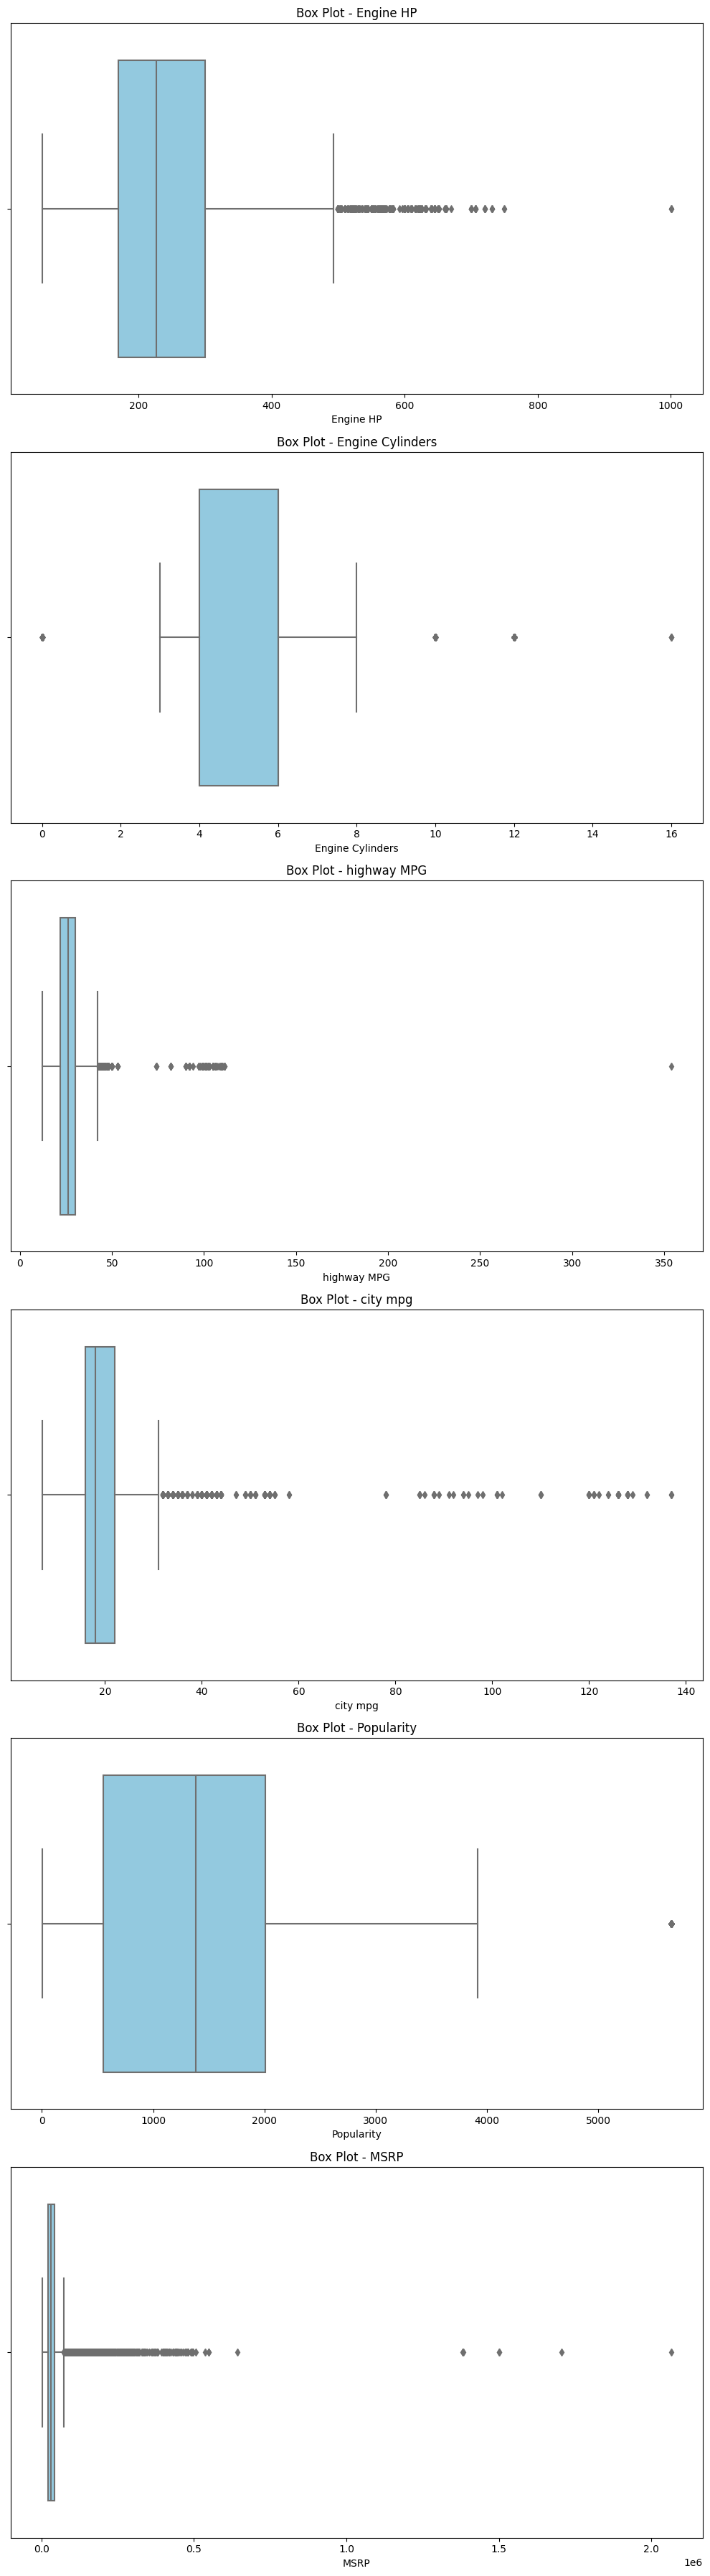

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the provided columns
columns_to_plot = ['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(columns_to_plot), figsize=(10, 6 * len(columns_to_plot)))

# Loop through each column and create a box plot
for i, column in enumerate(columns_to_plot):
    sns.boxplot(x=df[column], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Box Plot - {column}')

# Adjust layout
plt.tight_layout()
plt.show()


In [11]:
from scipy import stats

# Example for Z-Score method
numerical_columns = ['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']

for column in numerical_columns:
    z_scores = stats.zscore(df[column])
    df[column] = np.where(np.abs(z_scores) > 3, df[column].median(), df[column])

# Or using IQR method
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), df[column].median(), df[column])


In [12]:
from scipy import stats

numerical_columns = ['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']

outliers = pd.DataFrame()

for column in numerical_columns:
    z_scores = stats.zscore(df[column])
    outliers[column] = np.abs(z_scores) > 3

unique_outliers = df[outliers.any(axis=1)]
unique_outliers

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26.0,19.0,3916.0,46135.0
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28.0,19.0,3916.0,40650.0
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28.0,20.0,3916.0,36350.0
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28.0,18.0,3916.0,29450.0
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28.0,18.0,3916.0,34500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11901,BMW,Z4,2016,premium unleaded (required),240.0,4.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,34.0,22.0,3916.0,49700.0
11902,BMW,Z4,2016,premium unleaded (required),335.0,6.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Convertible,24.0,17.0,3916.0,66350.0
11903,BMW,Z8,2001,premium unleaded (required),394.0,8.0,MANUAL,rear wheel drive,2.0,"Exotic,Luxury,High-Performance",Compact,Convertible,19.0,12.0,3916.0,29995.0
11904,BMW,Z8,2002,premium unleaded (required),394.0,8.0,MANUAL,rear wheel drive,2.0,"Exotic,Luxury,High-Performance",Compact,Convertible,19.0,12.0,3916.0,29995.0


In [13]:
from scipy import stats

numerical_columns = ['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']

for column in numerical_columns:
    z_scores = np.abs(stats.zscore(df[column]))
    df = df[(z_scores <= 3)]  # Keep only rows where Z-Score is within 3 standard deviations

# df now contains rows without numerical outliers


In [14]:
numerical_columns = ['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']

outliers = pd.DataFrame()

for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[column] = (df[column] < lower_bound) | (df[column] > upper_bound)

unique_outliers = df[outliers.any(axis=1)]
unique_outliers

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
474,Alfa Romeo,4C,2015,premium unleaded (required),237.0,4.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Convertible,34.0,24.0,113.0,63900.0
475,Alfa Romeo,4C,2015,premium unleaded (required),237.0,4.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,34.0,24.0,113.0,68400.0
478,Alfa Romeo,4C,2016,premium unleaded (required),237.0,4.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Convertible,34.0,24.0,113.0,65900.0
737,Porsche,718 Cayman,2017,premium unleaded (required),350.0,4.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,26.0,20.0,1715.0,66300.0
933,Porsche,911,2015,premium unleaded (required),475.0,6.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,20.0,15.0,1715.0,29995.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11871,GMC,Yukon,2016,premium unleaded (recommended),420.0,8.0,AUTOMATIC,four wheel drive,4.0,Performance,Large,4dr SUV,21.0,15.0,549.0,68325.0
11874,GMC,Yukon,2016,flex-fuel (unleaded/E85),355.0,8.0,AUTOMATIC,four wheel drive,4.0,"Flex Fuel,Performance",Large,4dr SUV,22.0,16.0,549.0,60000.0
11875,GMC,Yukon,2017,premium unleaded (recommended),420.0,8.0,AUTOMATIC,four wheel drive,4.0,Performance,Large,4dr SUV,20.0,15.0,549.0,68965.0
11878,GMC,Yukon,2017,premium unleaded (recommended),420.0,8.0,AUTOMATIC,rear wheel drive,4.0,Performance,Large,4dr SUV,22.0,15.0,549.0,65965.0


In [15]:
numerical_columns = ['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']

for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# df now contains rows without numerical outliers


In [16]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
17,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24.0,17.0,3105.0,2000.0
18,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24.0,17.0,3105.0,2000.0
19,Audi,100,1992,regular unleaded,172.0,6.0,AUTOMATIC,all wheel drive,4.0,Luxury,Midsize,Wagon,20.0,16.0,3105.0,2000.0
20,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24.0,17.0,3105.0,2000.0
21,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,all wheel drive,4.0,Luxury,Midsize,Sedan,21.0,16.0,3105.0,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23.0,16.0,204.0,46120.0
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23.0,16.0,204.0,56670.0
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23.0,16.0,204.0,50620.0
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23.0,16.0,204.0,50920.0


In [17]:
df = df.reset_index(drop=True)
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24.0,17.0,3105.0,2000.0
1,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24.0,17.0,3105.0,2000.0
2,Audi,100,1992,regular unleaded,172.0,6.0,AUTOMATIC,all wheel drive,4.0,Luxury,Midsize,Wagon,20.0,16.0,3105.0,2000.0
3,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24.0,17.0,3105.0,2000.0
4,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,all wheel drive,4.0,Luxury,Midsize,Sedan,21.0,16.0,3105.0,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11187,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23.0,16.0,204.0,46120.0
11188,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23.0,16.0,204.0,56670.0
11189,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23.0,16.0,204.0,50620.0
11190,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23.0,16.0,204.0,50920.0


# Exploratory Data Analysis

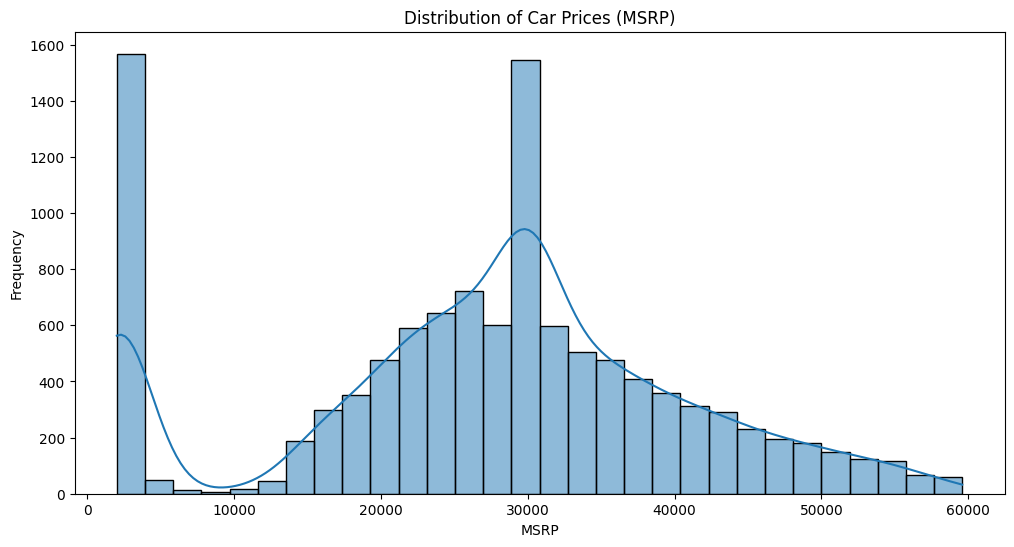

In [18]:
plt.figure(figsize=(12, 6))
sns.histplot(df['MSRP'], bins=30, kde=True)
plt.title('Distribution of Car Prices (MSRP)')
plt.xlabel('MSRP')
plt.ylabel('Frequency')
plt.show()


In [19]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11192.000000,11192.000000,11192.000000,11192.000000,11192.000000,11192.000000,11192.000000,11192.000000
mean,2010.112491,227.530050,5.454777,3.444083,26.003217,18.791101,1162.170390,27085.912974
std,7.690007,78.589687,1.427236,0.875902,5.999940,4.544241,735.361577,13665.205055
min,1990.000000,55.000000,3.000000,2.000000,12.000000,7.000000,2.000000,2000.000000
25%,2006.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000,20367.500000
50%,2014.000000,218.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,28982.500000
75%,2016.000000,283.000000,6.000000,4.000000,30.000000,22.000000,1720.000000,35315.000000
max,2017.000000,456.000000,8.000000,4.000000,42.000000,31.000000,3105.000000,59600.000000


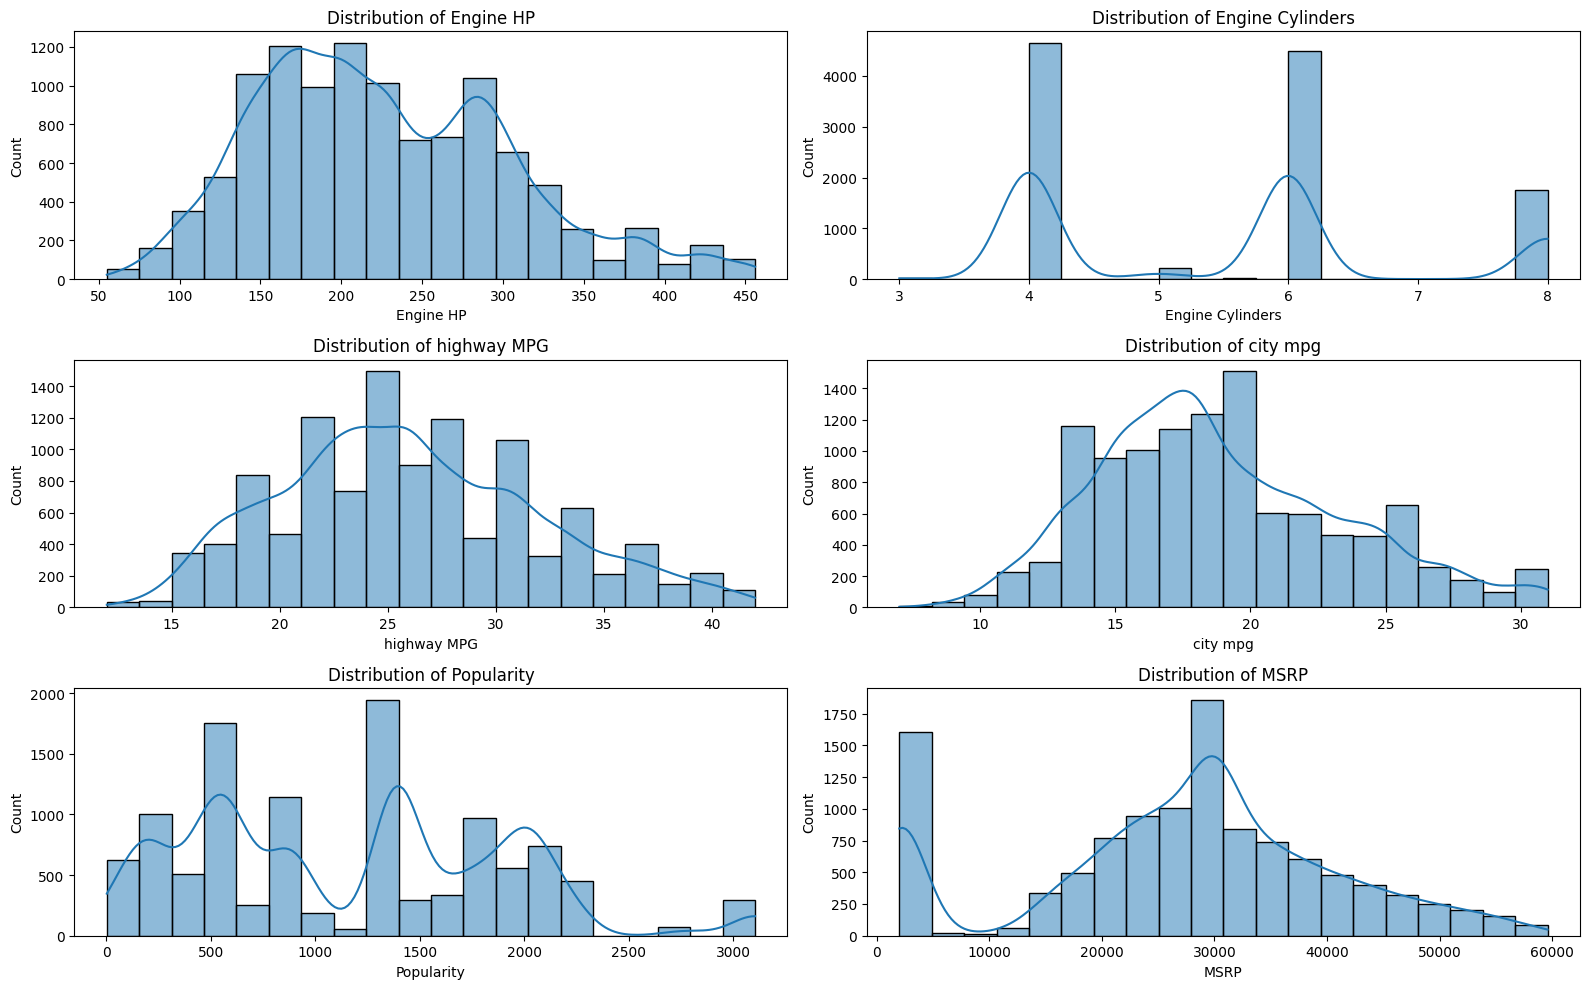

In [20]:
# Distribution of numerical features
numerical_columns = ['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']

plt.figure(figsize=(16, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


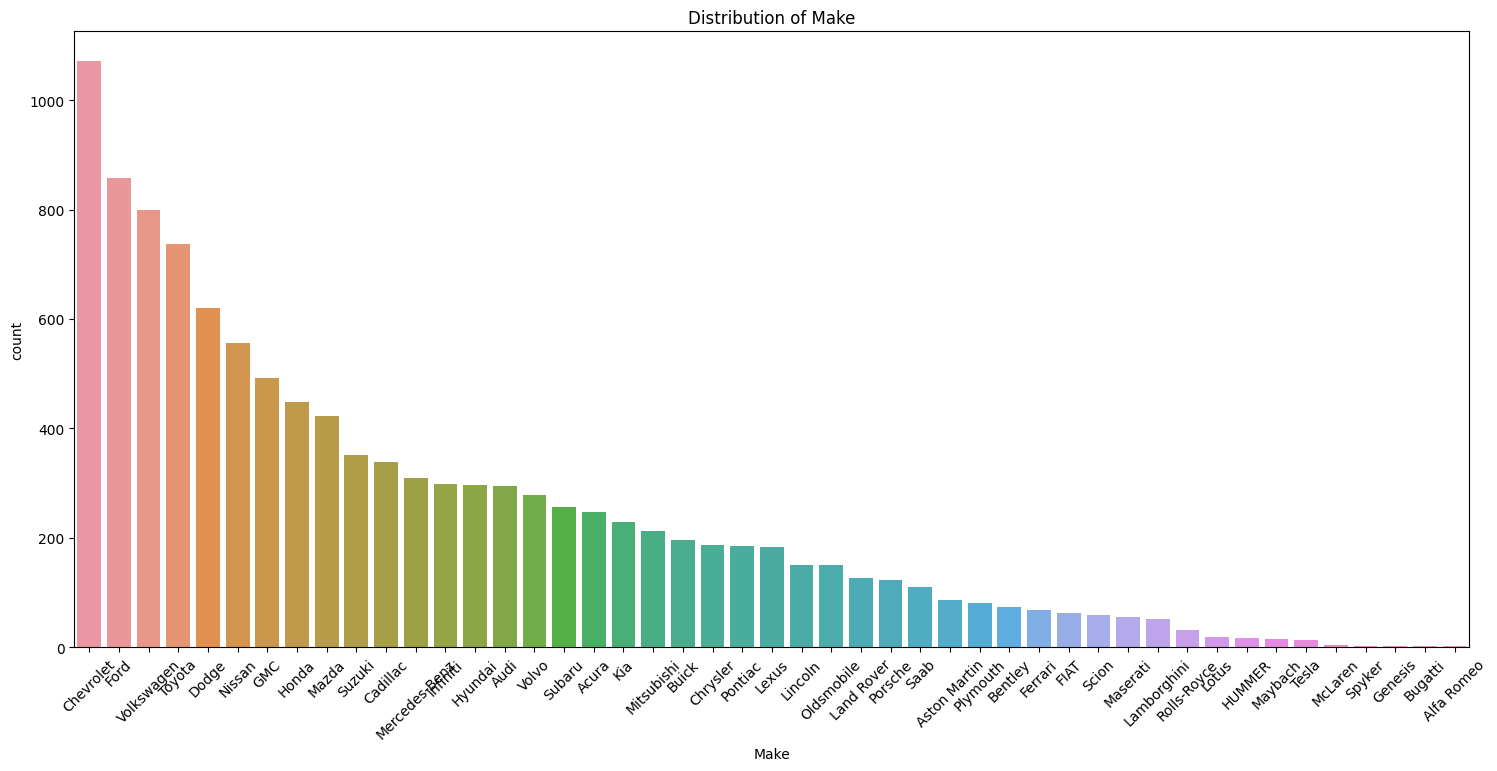

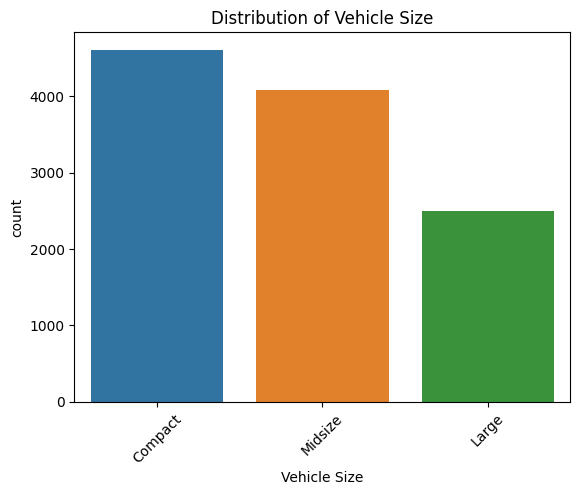

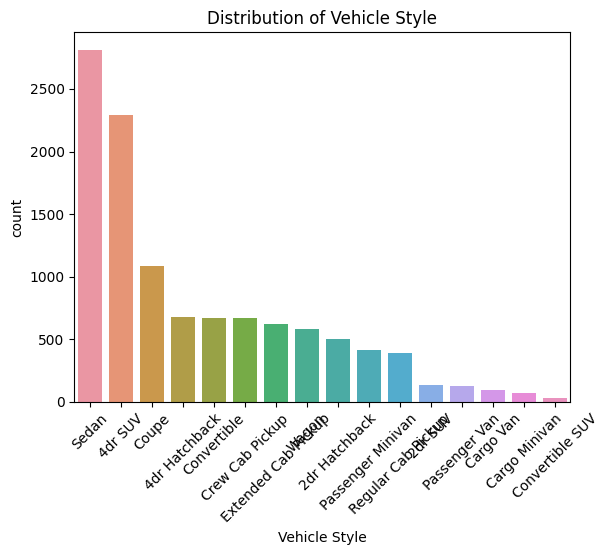

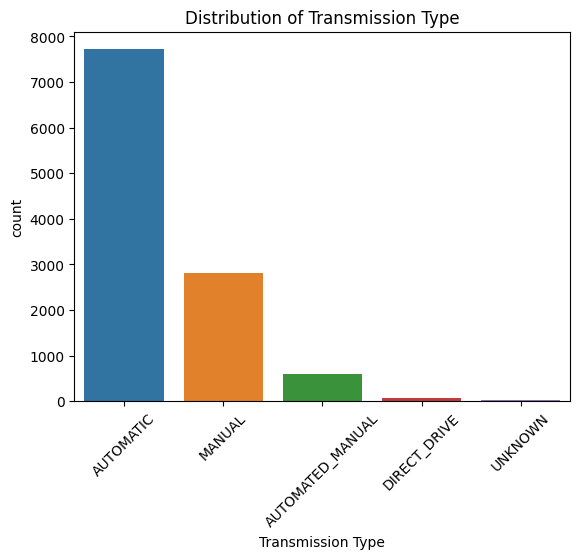

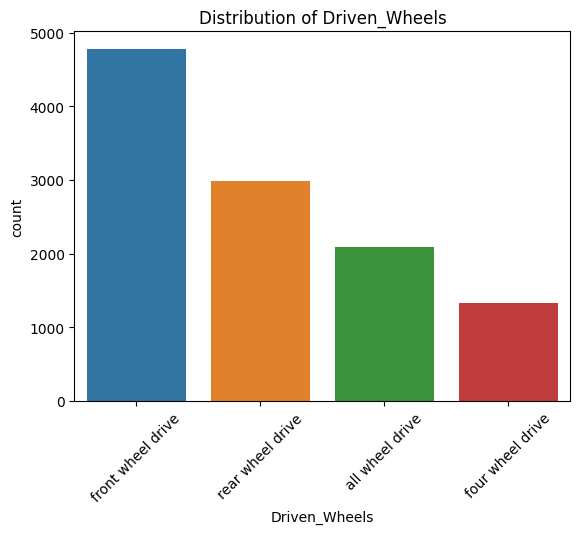

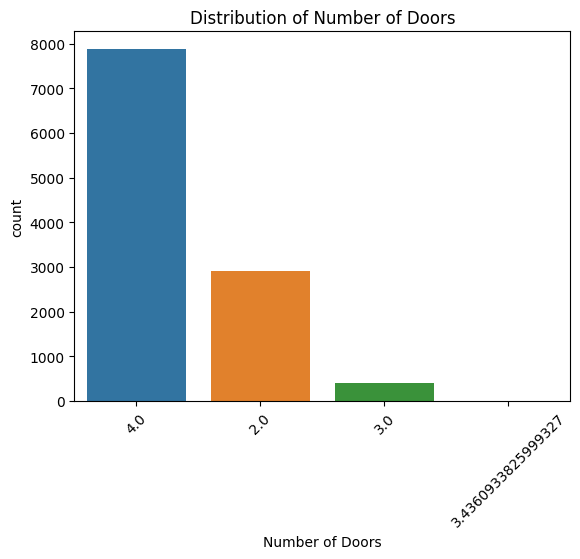

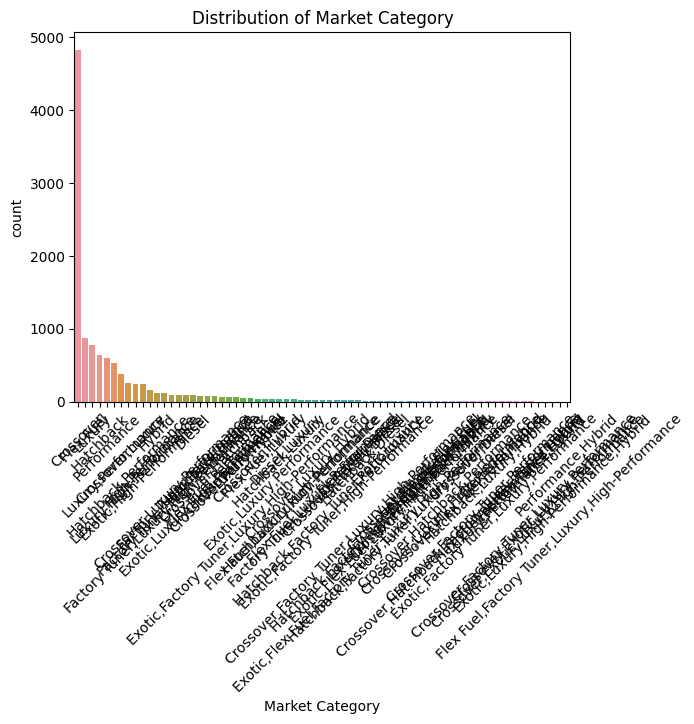

In [21]:
# Plot bar charts for categorical columns
categorical_columns = ['Make', 'Vehicle Size', 'Vehicle Style', 'Transmission Type','Driven_Wheels', 'Number of Doors', 'Market Category']

plt.figure(figsize=(18, 8))
for col in categorical_columns:
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
    plt.show()


In [22]:
# Calculate correlation matrix
correlation_matrix = df.corr()
correlation_matrix

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.368351,-0.076453,0.275802,0.322391,0.269564,0.129021,0.720490
Engine HP,0.368351,1.000000,0.677819,0.050633,-0.434785,-0.496164,0.040399,0.640594
Engine Cylinders,-0.076453,0.677819,1.000000,-0.059046,-0.715181,-0.743256,0.031066,0.251837
Number of Doors,0.275802,0.050633,-0.059046,1.000000,0.130102,0.132657,-0.037373,0.226638
highway MPG,0.322391,-0.434785,-0.715181,0.130102,1.000000,0.906756,0.016655,-0.040316
city mpg,0.269564,-0.496164,-0.743256,0.132657,0.906756,1.000000,0.029146,-0.093740
Popularity,0.129021,0.040399,0.031066,-0.037373,0.016655,0.029146,1.000000,0.025050
MSRP,0.720490,0.640594,0.251837,0.226638,-0.040316,-0.093740,0.025050,1.000000


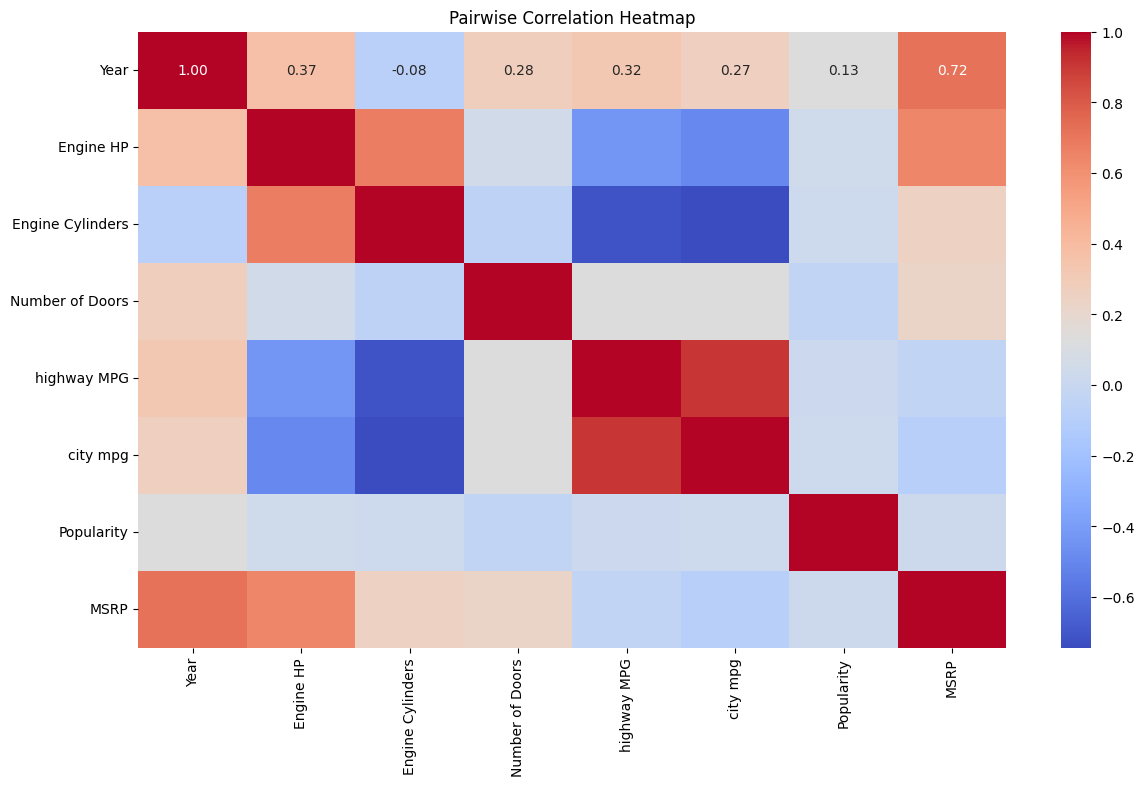

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Pairwise correlation heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pairwise Correlation Heatmap')
plt.show()

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the provided columns
numeric_columns = ['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']

# Calculate the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Identify the top correlated pairs
threshold = 0.7  # You can adjust this threshold based on your requirements
correlated_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Display the top correlated pairs
print("Top Correlated Pairs:")
for pair in correlated_pairs:
    print(pair)



Top Correlated Pairs:
('Engine Cylinders', 'highway MPG')
('Engine Cylinders', 'city mpg')
('highway MPG', 'city mpg')


In [25]:
import numpy as np
import pandas as pd

# Assuming df is your DataFrame with the provided columns
# If not done already, calculate the correlation matrix
correlation_matrix = df.corr()

# Extract the upper triangle of the correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool_))

# Find the best correlated pairs
best_correlated_pairs = upper_triangle.unstack().sort_values(ascending=False).dropna()

# Print the top N correlated pairs and their correlation values
N = 5  # You can adjust N based on your preference
print("Top", N, "correlated pairs:")
print(best_correlated_pairs.head(N))



Top 5 correlated pairs:
city mpg          highway MPG    0.906756
MSRP              Year           0.720490
Engine Cylinders  Engine HP      0.677819
MSRP              Engine HP      0.640594
Engine HP         Year           0.368351
dtype: float64


# Regression analysis

In [26]:
import statsmodels.api as sm
import pandas as pd

# Select the columns for regression analysis
columns_for_regression = ['city mpg', 'highway MPG', 'Year', 'Engine Cylinders', 'Engine HP', 'MSRP']

# Create a new DataFrame with selected columns
regression_data = df[columns_for_regression]

# Drop rows with missing values
regression_data = regression_data.dropna()

# Define the independent variables (X) and the dependent variable (y)
X = regression_data[['city mpg', 'highway MPG', 'Year', 'Engine Cylinders', 'Engine HP']]
y = regression_data['MSRP']

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                   MSRP   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     4858.
Date:                Fri, 26 Jan 2024   Prob (F-statistic):               0.00
Time:                        13:13:19   Log-Likelihood:            -1.1600e+05
No. Observations:               11192   AIC:                         2.320e+05
Df Residuals:                   11186   BIC:                         2.321e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2.089e+06   2.52e+04  

# Market Segementation 

In [27]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Define the list of categorical variables
categorical_variables = ['Make', 'Model', 'Engine Fuel Type', 'Transmission Type',
                          'Driven_Wheels', 'Number of Doors', 'Market Category',
                          'Vehicle Size', 'Vehicle Style']

# Convert each categorical variable to category type and perform ANOVA
for variable in categorical_variables:
    df[variable] = df[variable].astype('category')
    
    # Modify the formula to handle spaces in variable names
    formula = f'MSRP ~ C(Q("{variable}"))'
    
    model = ols(formula, data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    
    # Display the ANOVA table for each variable
    print(f"ANOVA for {variable}:")
    print(anova_table)
    print("\n" + "="*50 + "\n")


ANOVA for Make:
                    sum_sq       df          F  PR(>F)
C(Q("Make"))  4.083776e+11     46.0  58.845297     0.0
Residual      1.681405e+12  11145.0        NaN     NaN


ANOVA for Model:
                     sum_sq       df           F  PR(>F)
C(Q("Model"))  1.907540e+12    862.0  125.422149     0.0
Residual       1.822428e+11  10329.0         NaN     NaN


ANOVA for Engine Fuel Type:
                                sum_sq       df           F  PR(>F)
C(Q("Engine Fuel Type"))  4.273614e+11      9.0  319.397225     0.0
Residual                  1.662422e+12  11182.0         NaN     NaN


ANOVA for Transmission Type:
                                 sum_sq       df           F  PR(>F)
C(Q("Transmission Type"))  3.922724e+11      4.0  646.292078     0.0
Residual                   1.697511e+12  11187.0         NaN     NaN


ANOVA for Driven_Wheels:
                             sum_sq       df          F         PR(>F)
C(Q("Driven_Wheels"))  2.227436e+11      3.0  444.92104  4.

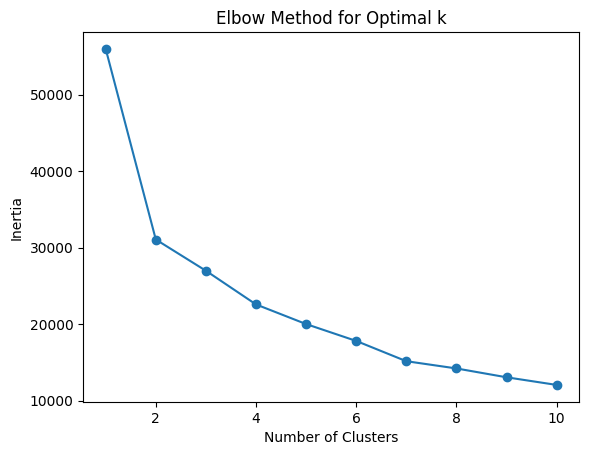

          Engine HP  Engine Cylinders  highway MPG   city mpg   Popularity
Cluster                                                                   
0        278.617950          6.623776    21.785330  15.498924  1259.954089
1        185.846380          4.493515    27.056513  19.704662   757.658685
2        165.407316          4.042673    34.143317  25.029388  1452.705314


In [28]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with car data

# Select relevant features for clustering
features_for_clustering = df[['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg', 'Popularity']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Based on the elbow method, choose the optimal k (number of clusters)

# Let's say the optimal k is 3
optimal_k = 3

# Apply K-means clustering with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Analyze the characteristics of each cluster
cluster_analysis = df.groupby('Cluster')[['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg', 'Popularity']].mean()
print(cluster_analysis)


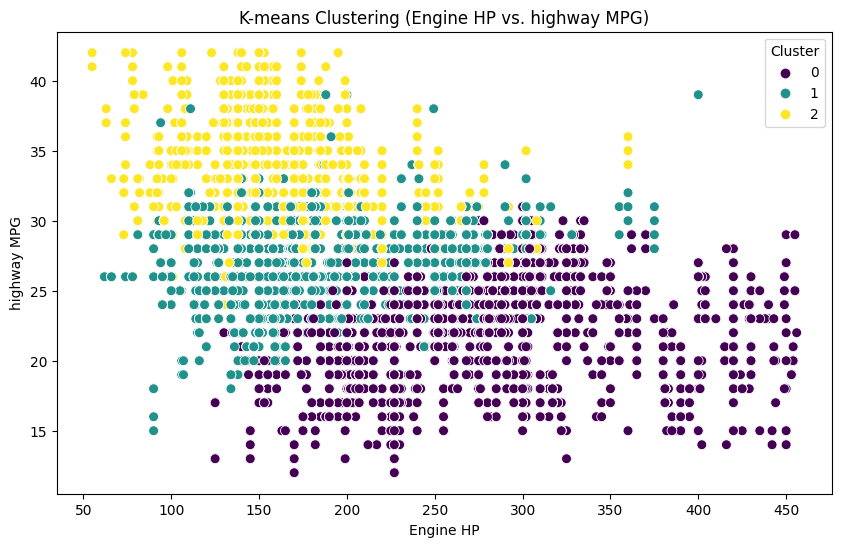

In [29]:
import seaborn as sns

# Pairwise scatter plot for two features with cluster colors
def plot_clusters(feature1, feature2, df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feature1, y=feature2, hue='Cluster', data=df, palette='viridis', s=50)
    plt.title(f'K-means Clustering ({feature1} vs. {feature2})')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.legend(title='Cluster')
    plt.show()

# Choose two features for visualization
feature1 = 'Engine HP'
feature2 = 'highway MPG'

# Plot clusters for the selected features
plot_clusters(feature1, feature2, df)


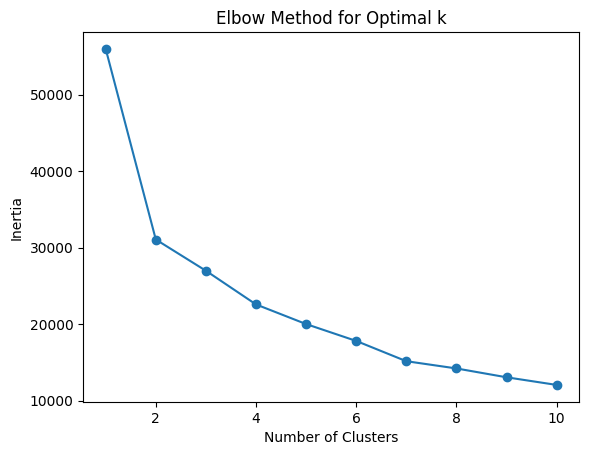

In [30]:
features_for_clustering = df[['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg', 'Popularity']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()
optimal_k = 3  # Replace with the chosen optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Numerical_Cluster'] = kmeans.fit_predict(scaled_features)


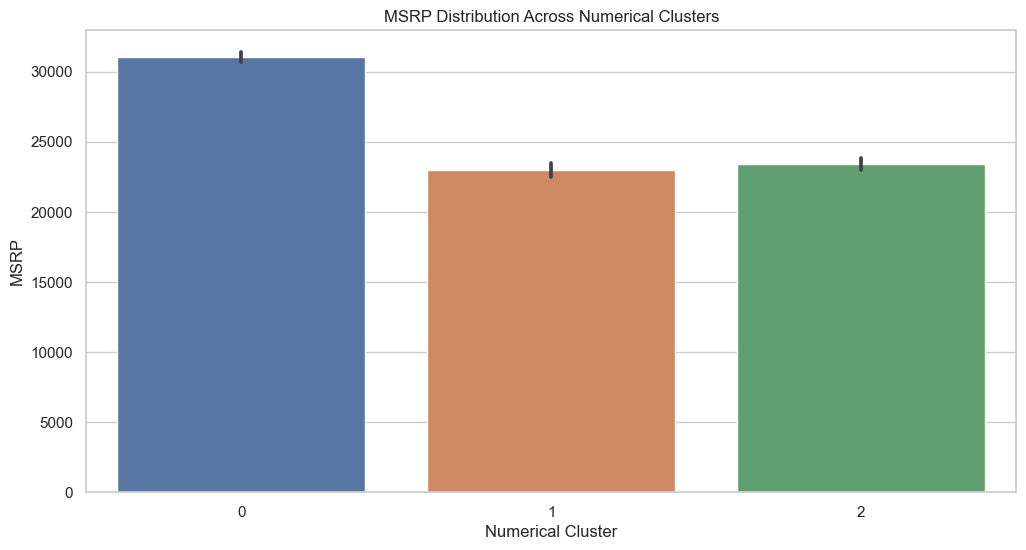

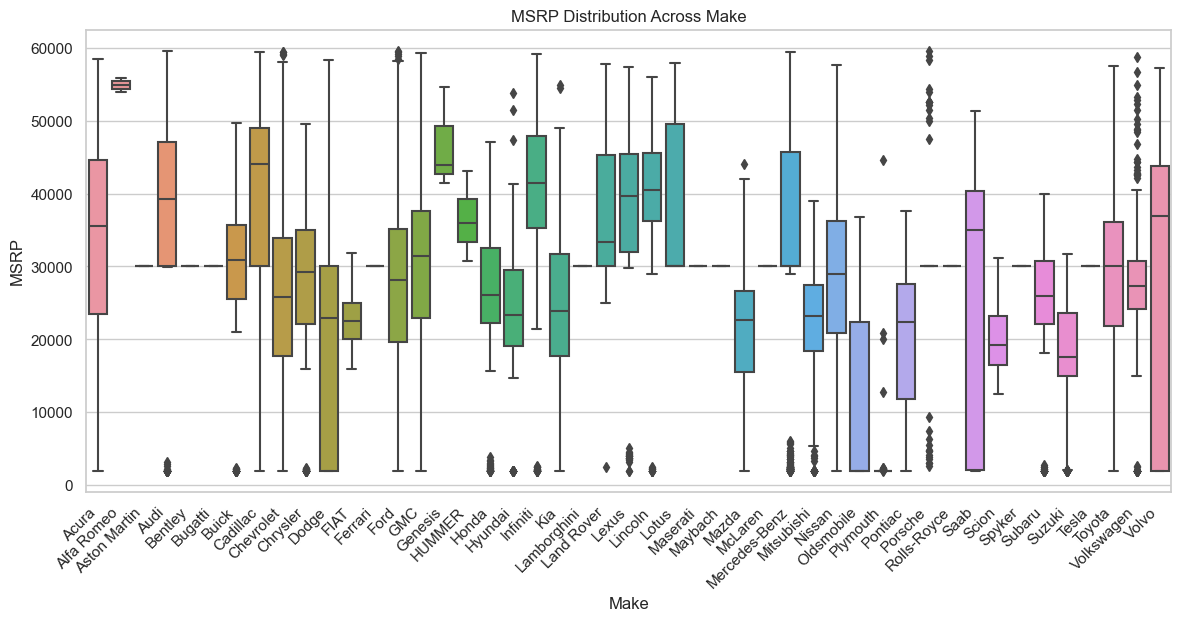

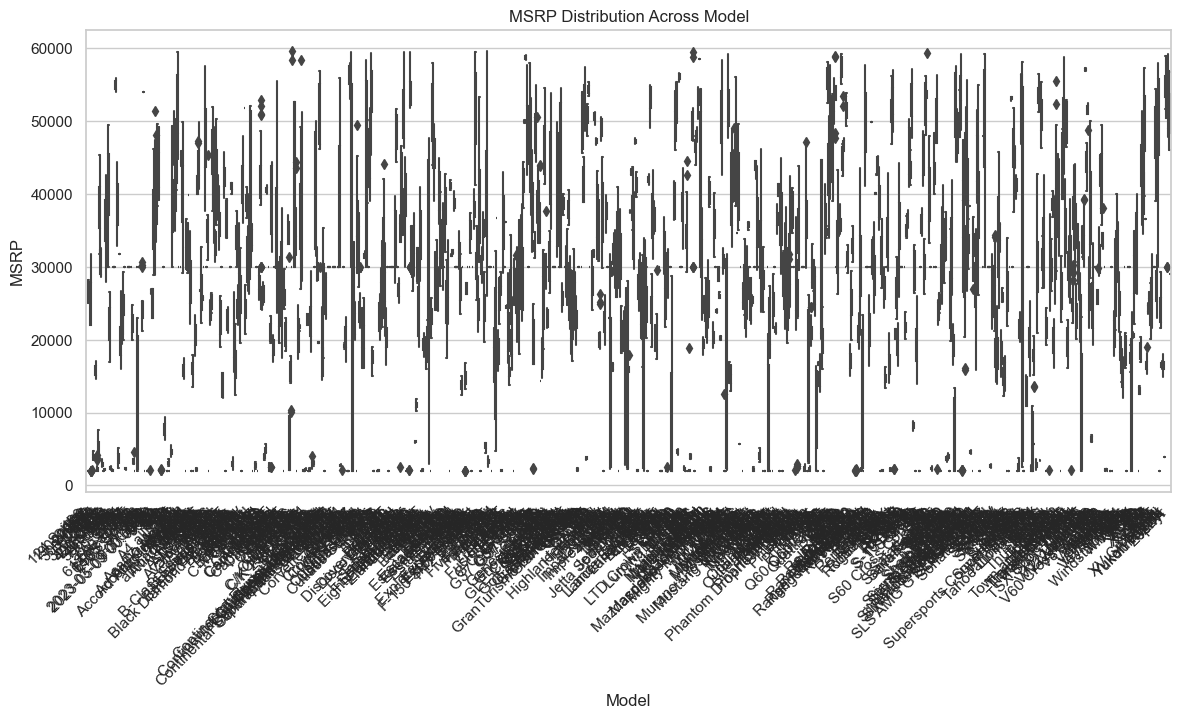

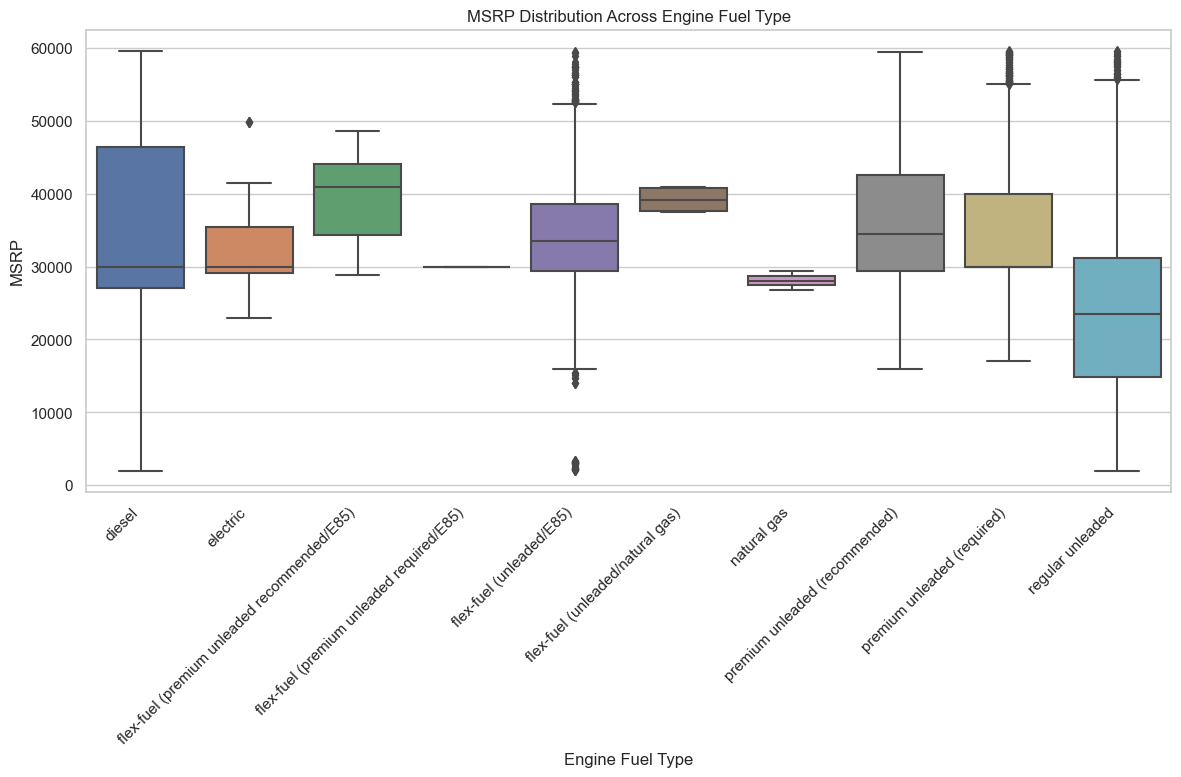

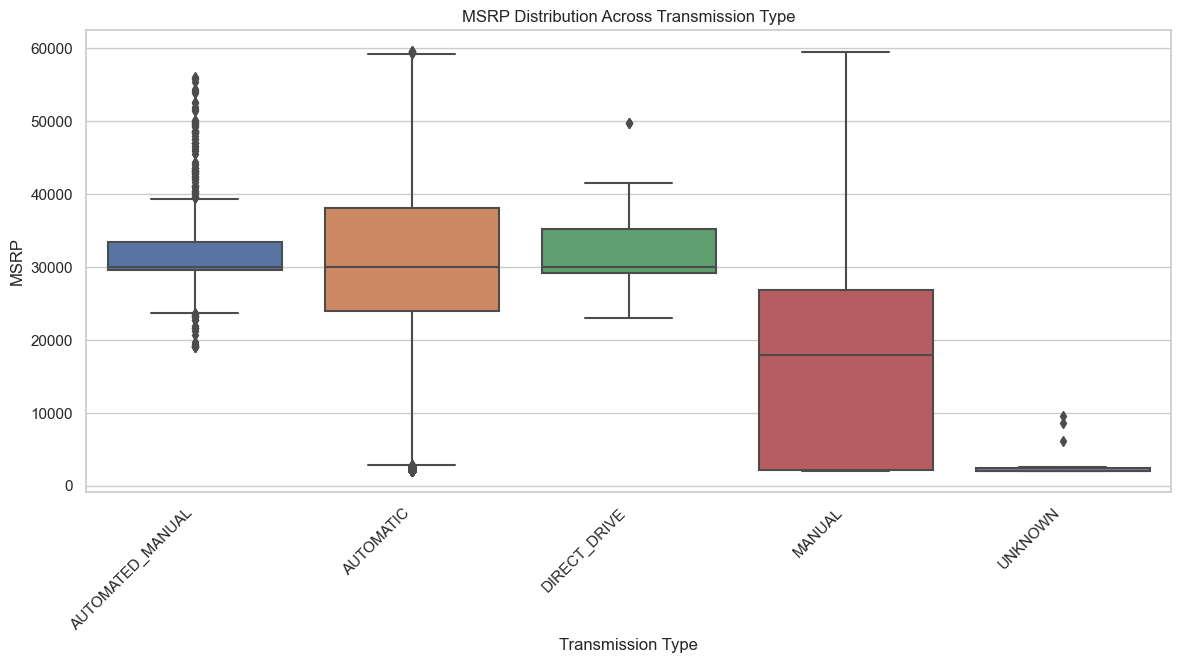

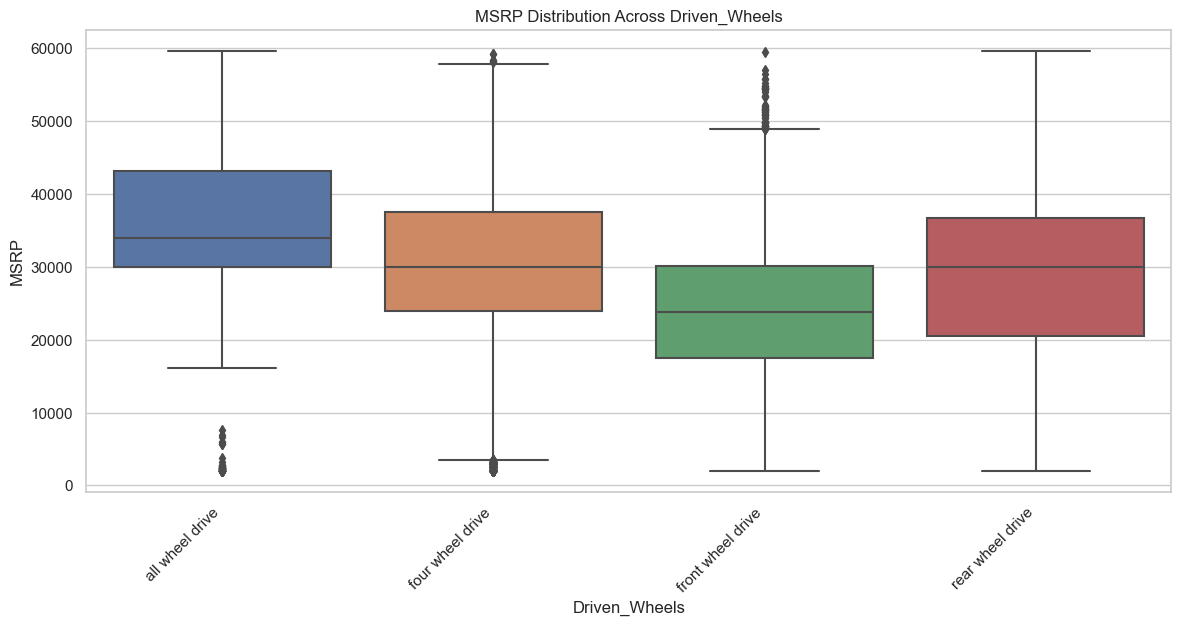

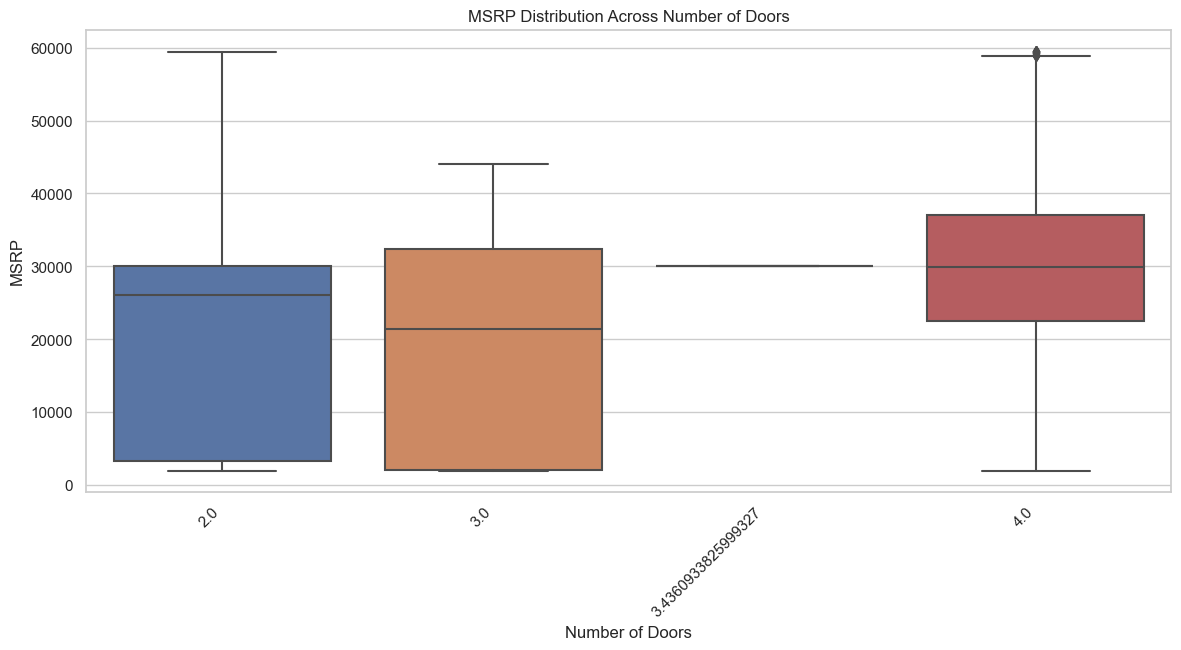

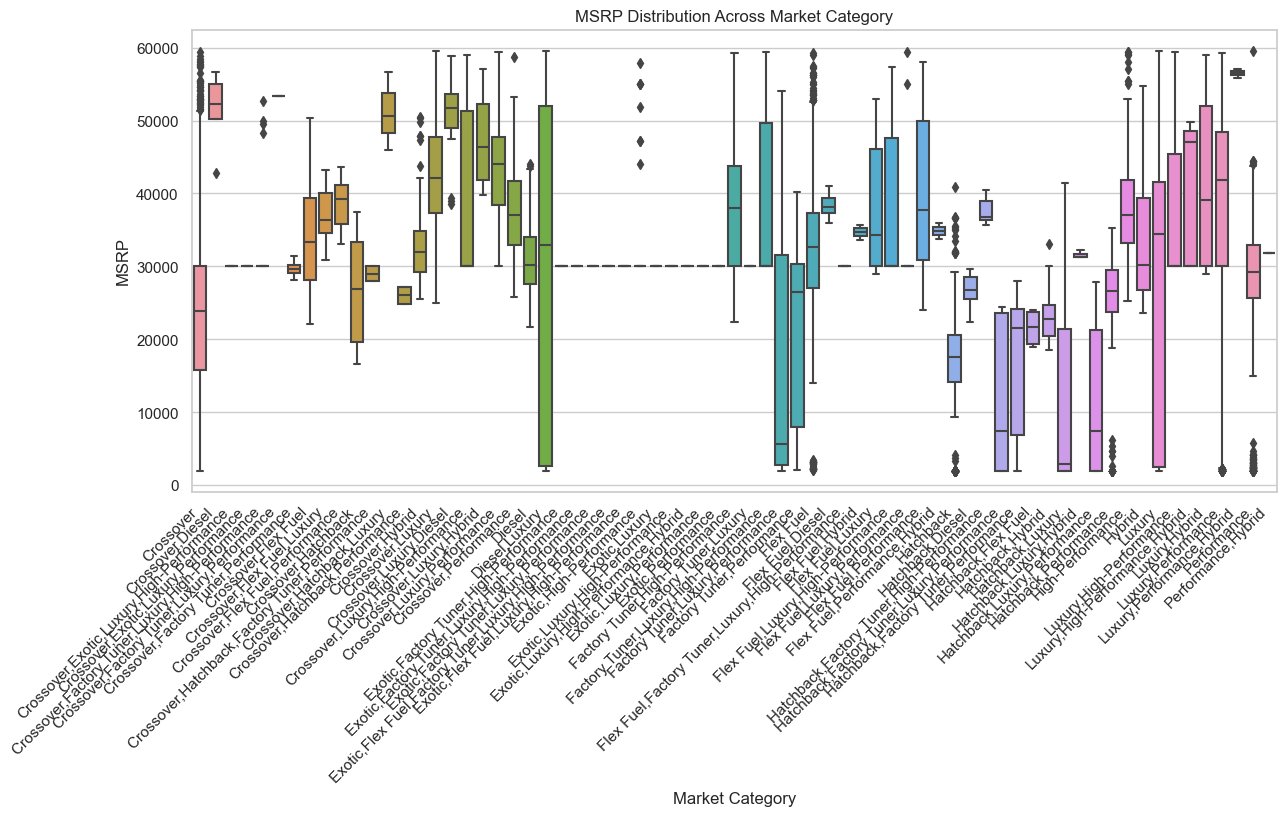

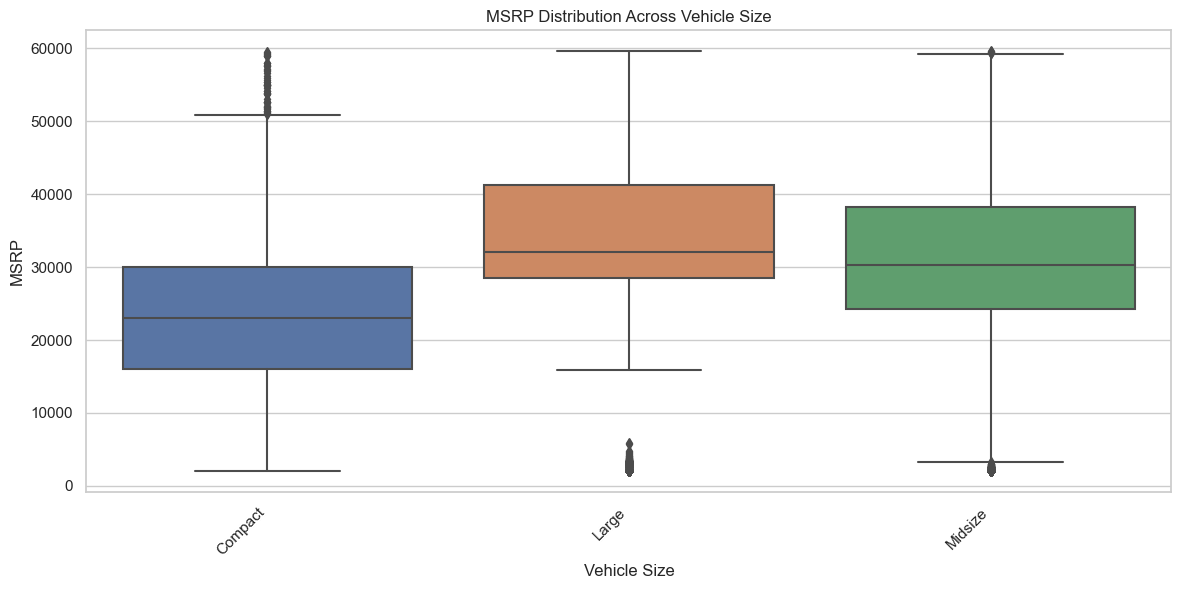

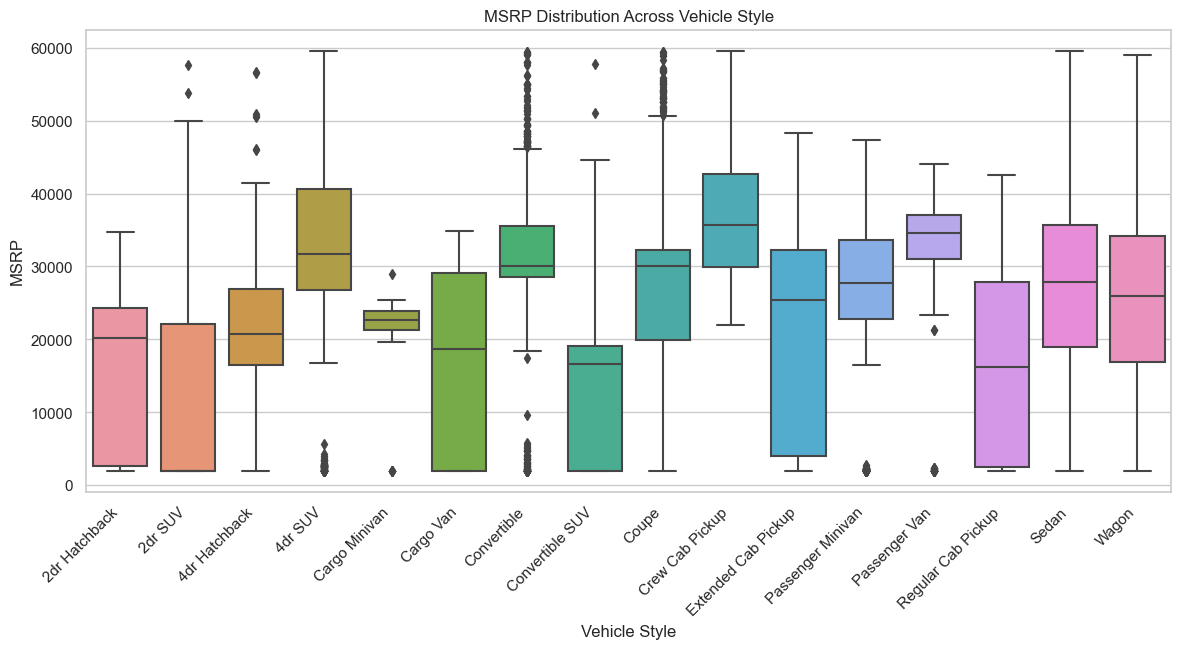

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set(style="whitegrid")

# Bar chart for MSRP distribution across Numerical Clusters
plt.figure(figsize=(12, 6))
sns.barplot(x='Numerical_Cluster', y='MSRP', data=df)
plt.title('MSRP Distribution Across Numerical Clusters')
plt.xlabel('Numerical Cluster')
plt.ylabel('MSRP')
plt.show()

# Boxplot for MSRP distribution across Categorical Variables
for variable in categorical_variables:
    plt.figure(figsize=(14, 6))
    sns.boxplot(x=variable, y='MSRP', data=df)
    plt.title(f'MSRP Distribution Across {variable}')
    plt.xlabel(variable)
    plt.ylabel('MSRP')
    plt.xticks(rotation=45, ha='right')
    plt.show()


Based on the visualizations and analyses performed, here are some insights into patterns or trends in MSRP based on different segments:

Numerical Clusters:

Numerical Cluster 0 tends to have higher MSRP compared to Clusters 1 and 2.
Characteristics of Cluster 0: Higher Engine HP, more Engine Cylinders, lower highway and city MPG, and higher Popularity.
Categorical Variables:

Make:
MSRP varies significantly across different car makes.
Some makes tend to have higher average MSRP than others.
Model:
MSRP varies across different car models.
Some models have higher average MSRP compared to others.
Engine Fuel Type:
Different engine fuel types exhibit variations in MSRP.
For some fuel types, MSRP tends to be higher on average.
Transmission Type:
MSRP differs based on the type of transmission.
Certain transmission types are associated with higher average MSRP.
Driven Wheels:
Driven wheels influence MSRP, with certain types associated with higher average prices.
Number of Doors:
MSRP varies based on the number of doors, with specific counts associated with higher prices.
Market Category:
Different market categories show variations in MSRP.
Some market categories have higher average MSRP.
Vehicle Size:
Vehicle size impacts MSRP, with larger sizes often associated with higher prices.
Vehicle Style:
Vehicle styles exhibit variations in MSRP.
Certain styles tend to have higher average MSRP.
Overall Trends:

Luxury car makes and models often have higher MSRP.
Performance-related features (higher Engine HP, more Cylinders) are associated with higher MSRP.
Larger and more luxurious vehicle styles tend to have higher MSRP.
These observations provide a general overview, and further analysis or specific inquiries into particular segments can reveal more detailed insights.







# Feature Importance Analysis:

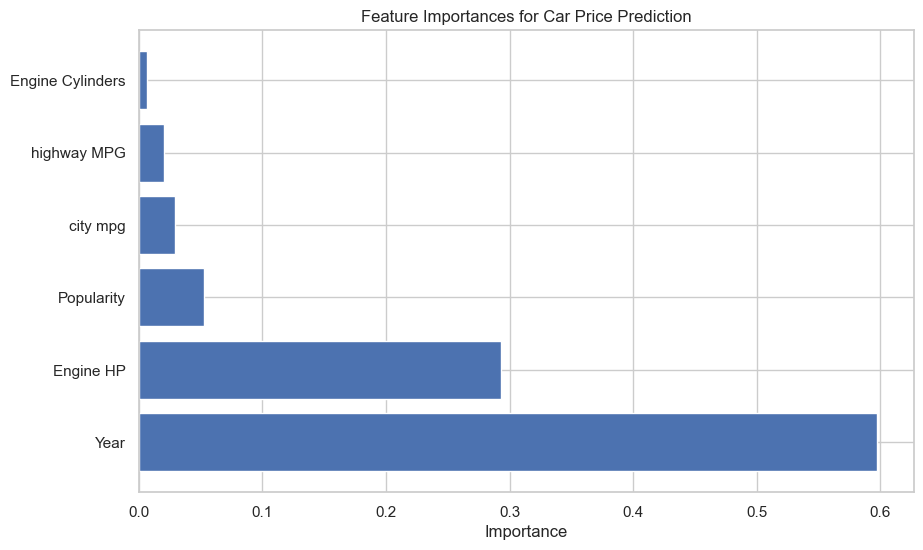

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with car data

# Select features and target variable
features = ['Year', 'Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg', 'Popularity']
target = 'MSRP'

# Handle categorical variables (if any)
# You may need to encode categorical variables using techniques like one-hot encoding

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Create a decision tree regressor
model = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances for Car Price Prediction')
plt.show()

# Evaluate the model on the test set (optional)
test_predictions = model.predict(X_test)
# You can assess model performance metrics or use the model for further analysis

# Use the model for prediction (optional)
# You can use the trained model to predict car prices for new data


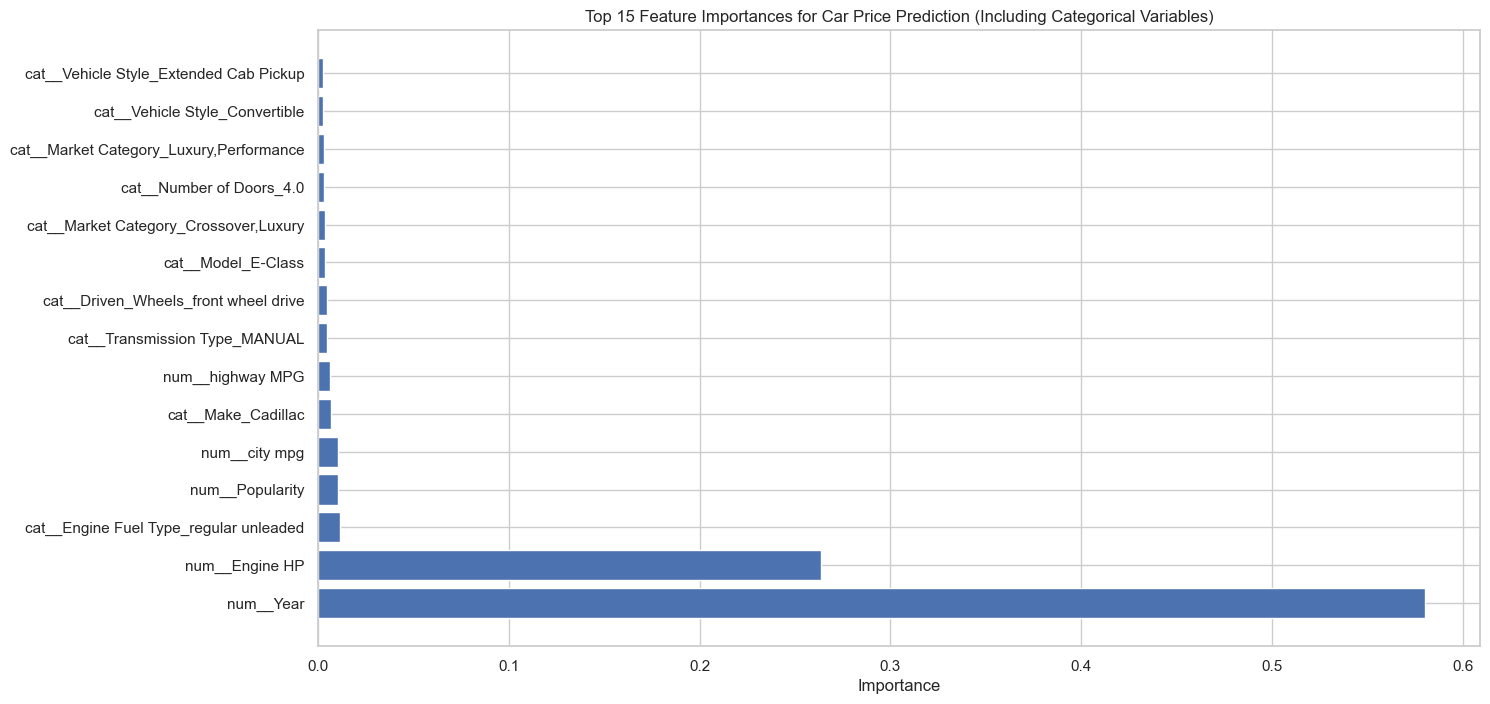

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Assuming df is your DataFrame with car data

# Convert all values in the "Number of Doors" column to strings
df['Model'] = df['Model'].astype(str)

df['Number of Doors'] = df['Number of Doors'].astype(str)

# Select numerical features
numerical_features = ['Year', 'Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg', 'Popularity']

# Select categorical features
categorical_features = ['Make', 'Model', 'Engine Fuel Type', 'Transmission Type',
                          'Driven_Wheels', 'Number of Doors', 'Market Category',
                          'Vehicle Size', 'Vehicle Style']

# Select target variable
target = 'MSRP'

# Create a column transformer to apply different preprocessing to numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Apply the column transformer to the data
X = preprocessor.fit_transform(df.drop(target, axis=1))
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree regressor
model = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': preprocessor.get_feature_names_out(), 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display only the top N most important features
top_n = 15  # Adjust this value based on your preference

# Plot feature importances
plt.figure(figsize=(15, 8))
plt.barh(importance_df['Feature'][:top_n], importance_df['Importance'][:top_n])
plt.xlabel('Importance')
plt.title(f'Top {top_n} Feature Importances for Car Price Prediction (Including Categorical Variables)')
plt.show()


# Consumer Demand Analysis:

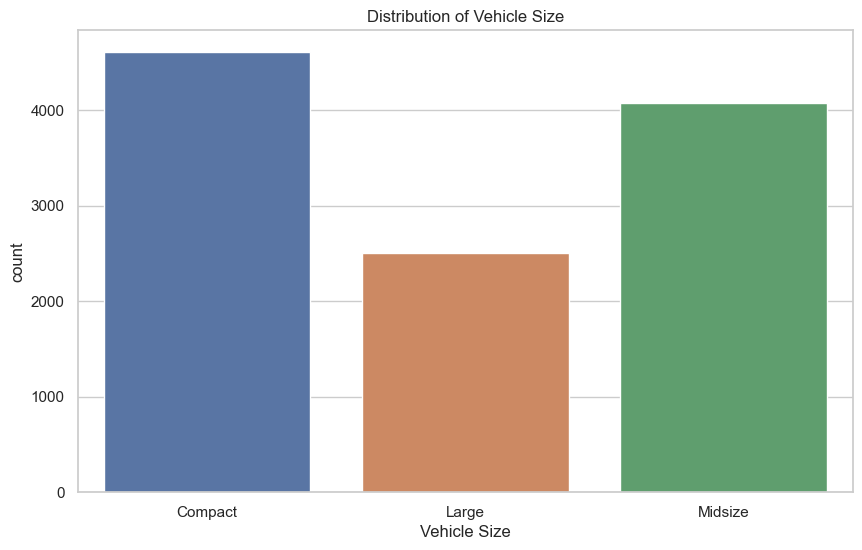

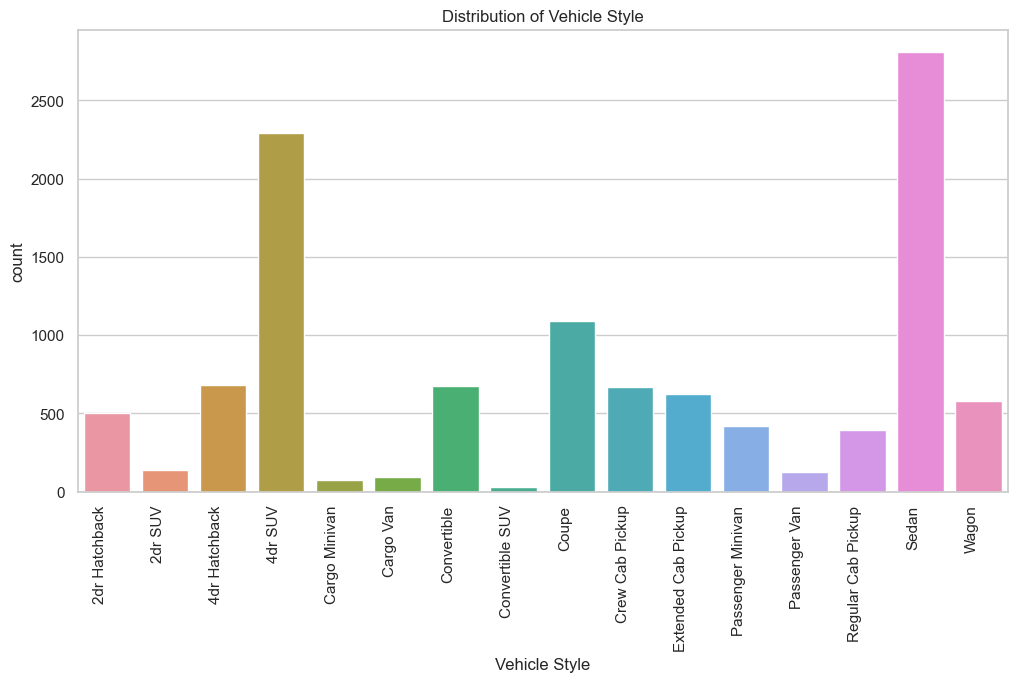

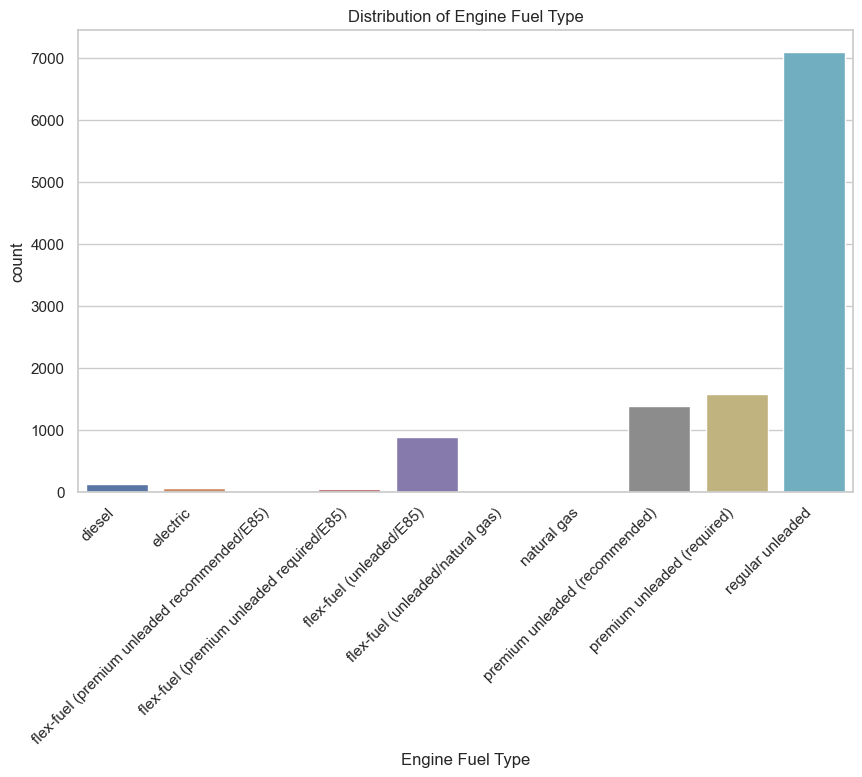

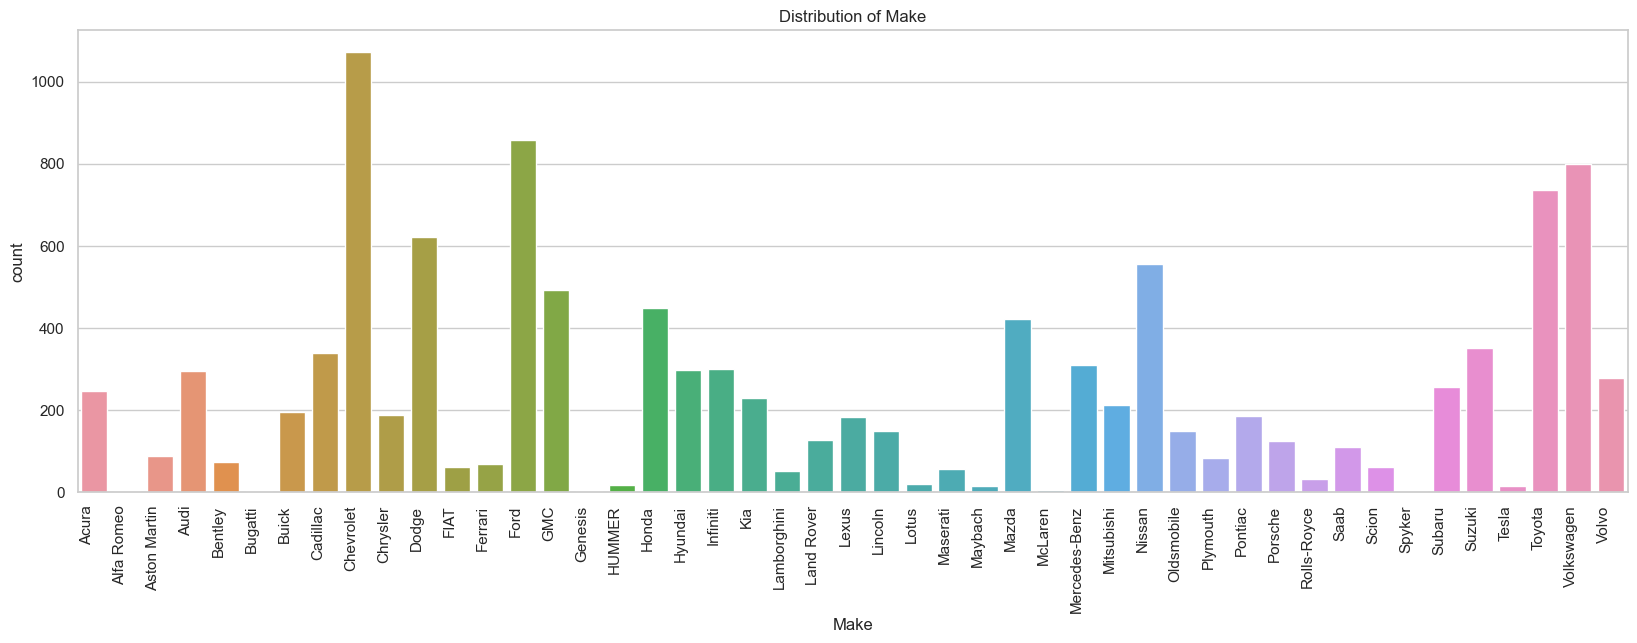

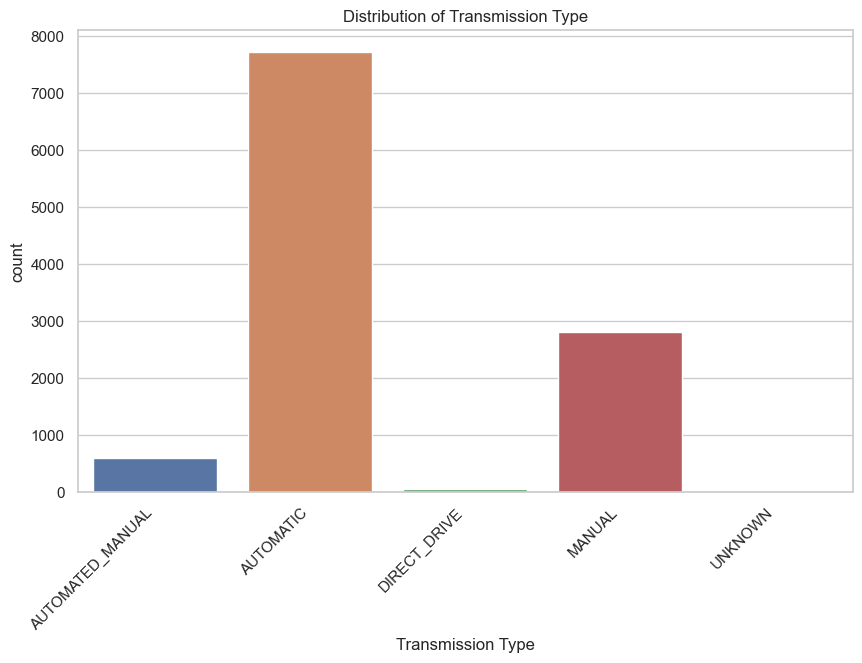

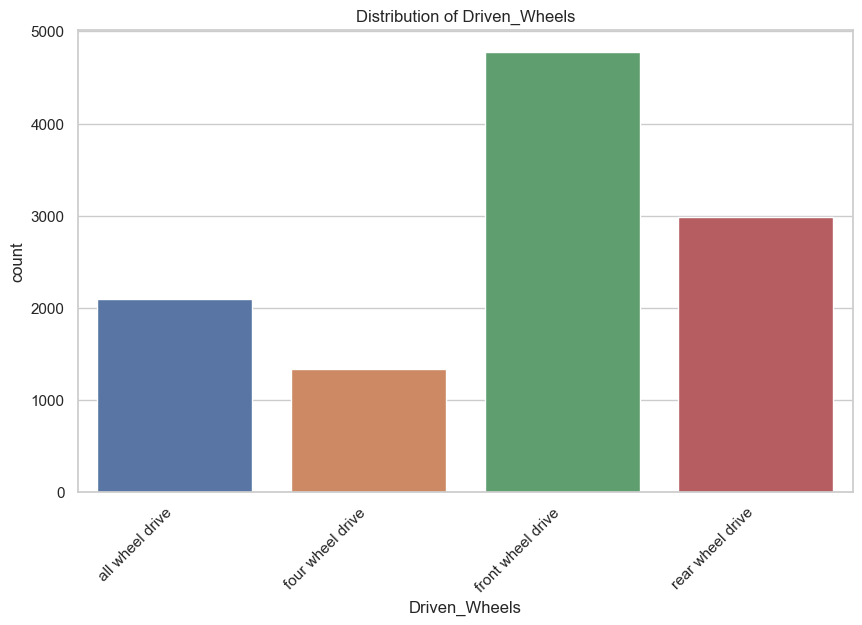

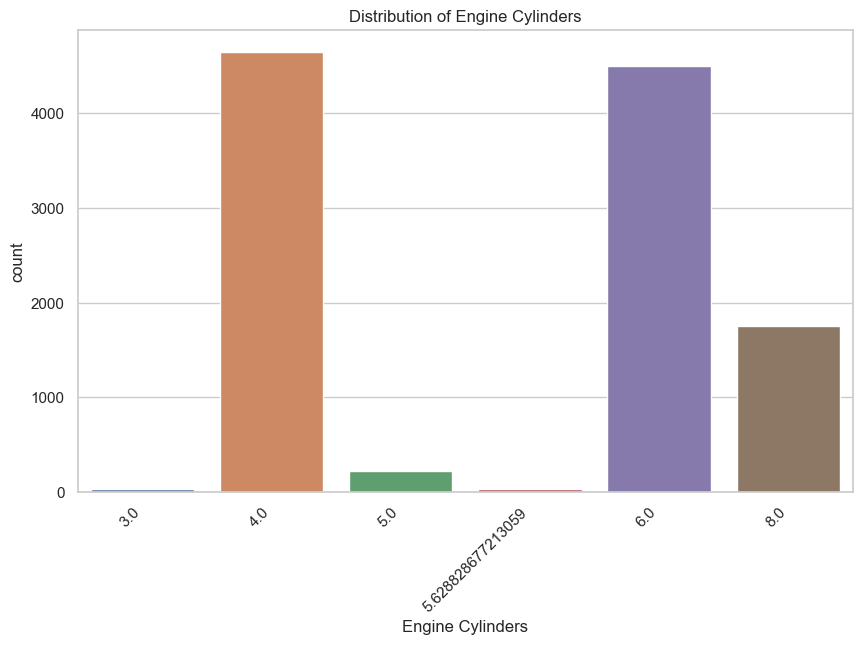

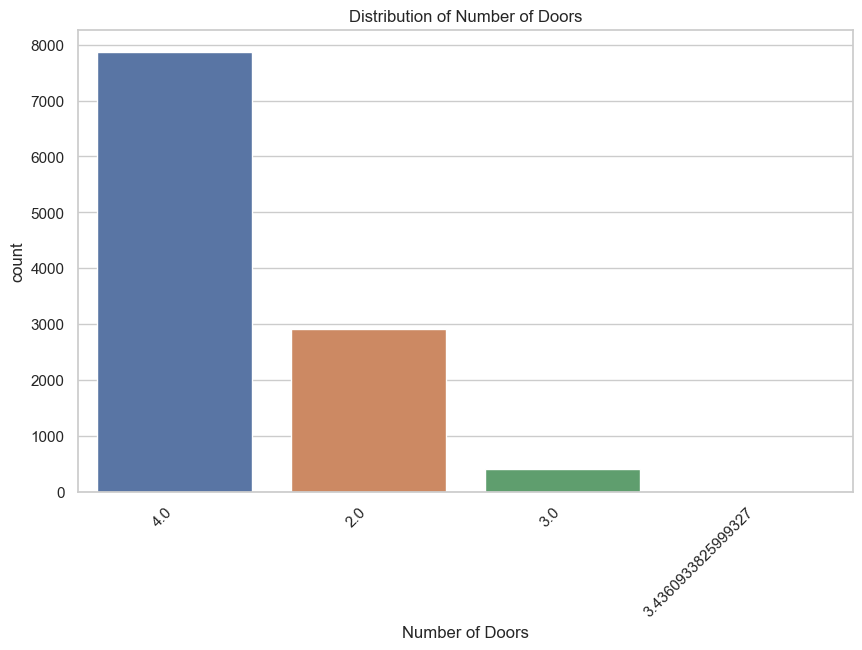

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Vehicle Size
plt.figure(figsize=(10, 6))
sns.countplot(x='Vehicle Size', data=df)
plt.title('Distribution of Vehicle Size')
plt.show()

# Distribution of Vehicle Style
plt.figure(figsize=(12, 6))
sns.countplot(x='Vehicle Style', data=df)
plt.title('Distribution of Vehicle Style')
plt.xticks(rotation=90, ha='right')
plt.show()

# Distribution of Engine Fuel Type
plt.figure(figsize=(10, 6))
sns.countplot(x='Engine Fuel Type', data=df)
plt.title('Distribution of Engine Fuel Type')
plt.xticks(rotation=45, ha='right')
plt.show()

# Distribution of Make
plt.figure(figsize=(20, 6))
sns.countplot(x='Make', data=df)
plt.title('Distribution of Make')
plt.xticks(rotation=90, ha='right')
plt.show()

# Distribution of Transmission Type
plt.figure(figsize=(10, 6))
sns.countplot(x='Transmission Type', data=df)
plt.title('Distribution of Transmission Type')
plt.xticks(rotation=45, ha='right')
plt.show()

# Distribution of Driven_Wheels
plt.figure(figsize=(10, 6))
sns.countplot(x='Driven_Wheels', data=df)
plt.title('Distribution of Driven_Wheels')
plt.xticks(rotation=45, ha='right')
plt.show()

# Distribution of Engine Cylinders
plt.figure(figsize=(10, 6))
sns.countplot(x='Engine Cylinders', data=df)
plt.title('Distribution of Engine Cylinders')
plt.xticks(rotation=45, ha='right')
plt.show()

# Distribution of Number of Doors
plt.figure(figsize=(10, 6))
sns.countplot(x='Number of Doors', data=df)
plt.title('Distribution of Number of Doors')
plt.xticks(rotation=45, ha='right')
plt.show()




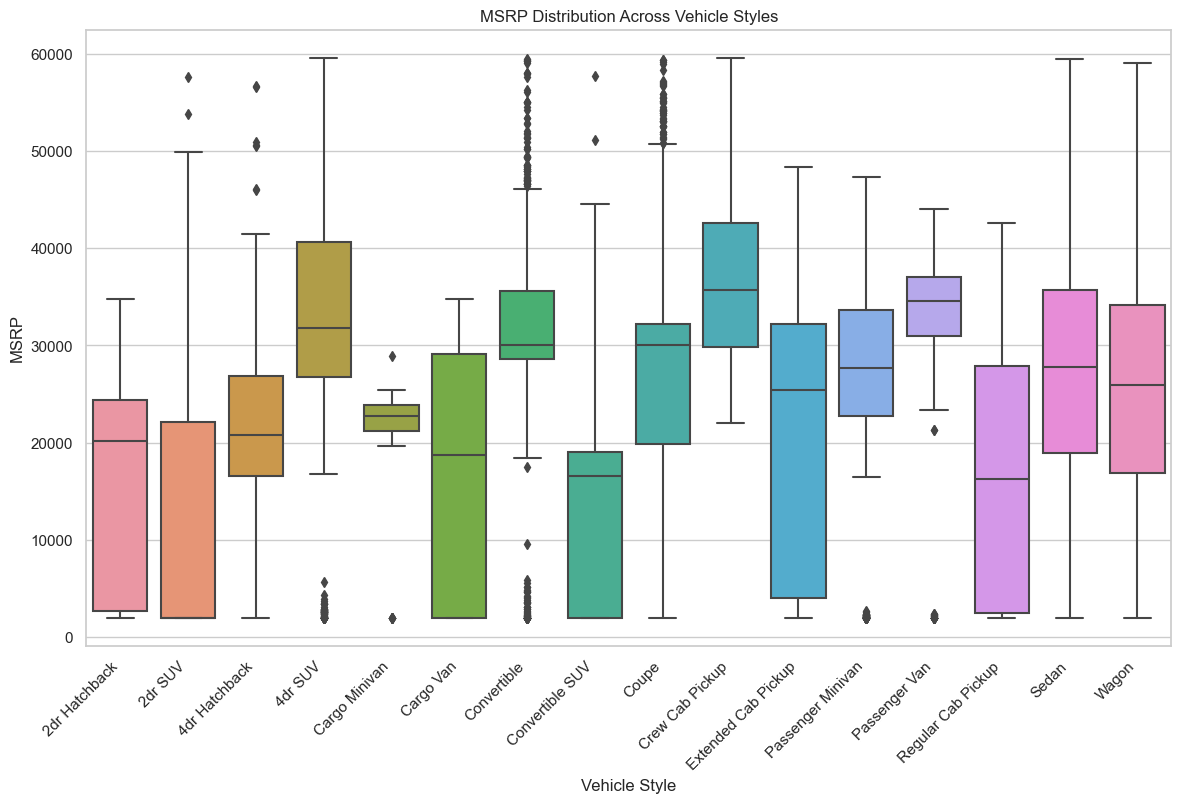

In [35]:
# Box plot for MSRP across Vehicle Styles
plt.figure(figsize=(14, 8))
sns.boxplot(x='Vehicle Style', y='MSRP', data=df)
plt.title('MSRP Distribution Across Vehicle Styles')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Vehicle Style')
plt.ylabel('MSRP')
plt.show()


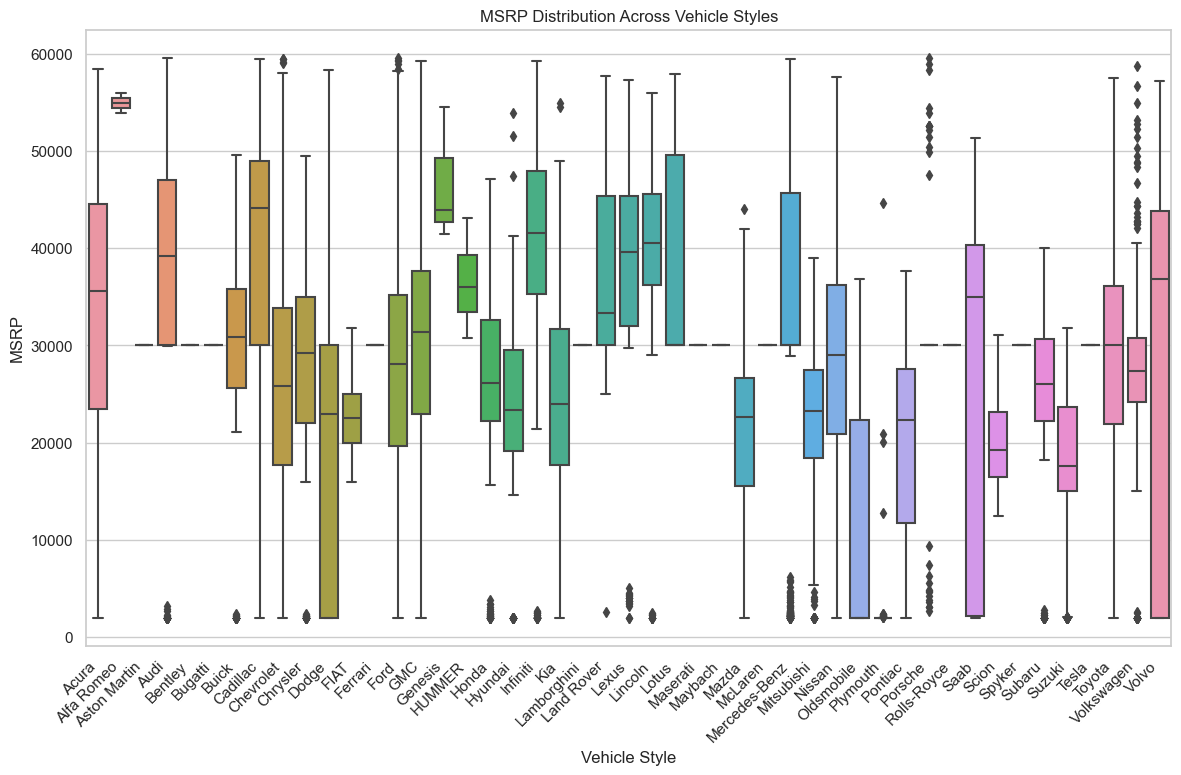

In [43]:
# Box plot for MSRP across Vehicle Styles
plt.figure(figsize=(14, 8))
sns.boxplot(x='Make', y='MSRP', data=df)
plt.title('MSRP Distribution Make')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Vehicle Style')
plt.ylabel('MSRP')
plt.show()


# Sensitivity Analysis


Mean Squared Error: 55898113.73957528


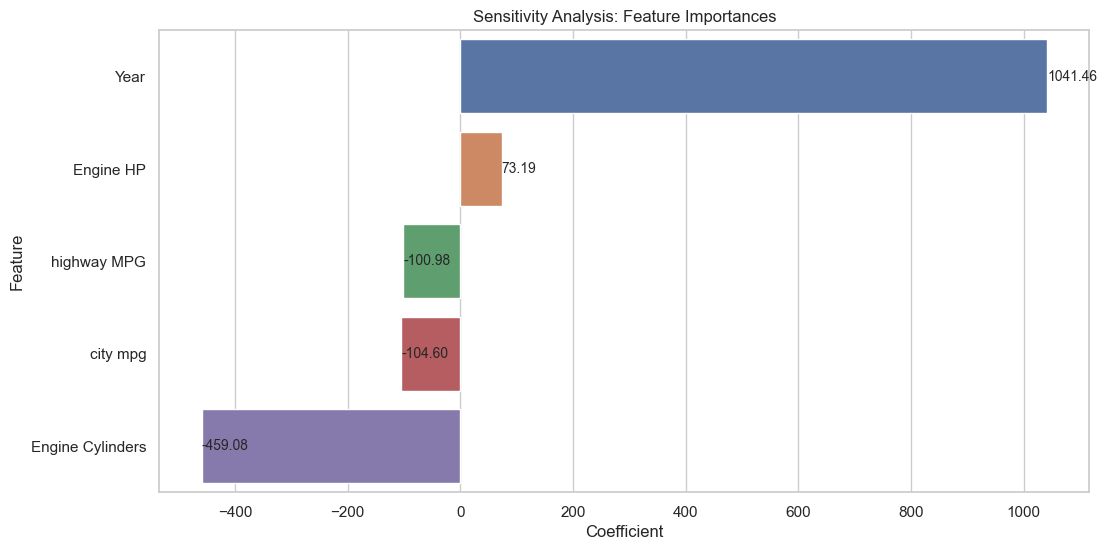

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming df is your DataFrame with car data
# If needed, preprocess the data and handle missing values

# Select relevant features for sensitivity analysis, including 'MSRP'
sensitivity_features = ['city mpg', 'highway MPG', 'Year', 'Engine Cylinders', 'Engine HP', 'MSRP']

# Create a subset DataFrame with selected features
sensitivity_df = df[sensitivity_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sensitivity_df.drop('MSRP', axis=1), sensitivity_df['MSRP'], test_size=0.2, random_state=42)

# Fit a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Assess model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize feature importances
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)

# Add values on top of each bar
for index, value in enumerate(coefficients['Coefficient']):
    plt.text(value, index, f'{value:.2f}', ha='left', va='center', fontsize=10)

plt.title('Sensitivity Analysis: Feature Importances')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

